In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')



from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df = pd.read_csv("/content/dataset_behaviour_disorders - Categorical....csv")

In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
  df[column]= le.fit_transform(df[column])


In [ ]:
df

,ID,genHistory,hyperactivity,forgetfulness,disobeyInst,noDangerSense,antisocial,harmingNature,irrSleep,lowEsteem,repTempTantrum,noAttention,repeatWords,respNamesBy9months,noPlaywithOtherby36Months,noGestures12Months,unusualEating,chanceOfDisorder
0,0,0,2,2,2,3,3,3,0,3,3,2,2,3,0,2,3,1
1,1,2,0,0,0,2,0,0,3,0,3,2,3,2,0,3,1,1
2,2,1,3,3,2,2,3,3,0,2,2,1,3,1,2,0,1,1
3,3,3,3,0,3,0,0,0,2,1,1,3,1,1,0,3,3,0
4,4,3,1,1,1,2,2,2,0,2,1,1,0,2,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,1,1,1,3,2,2,2,0,3,3,2,1,1,2,1,3,0
495,495,0,1,1,3,0,3,3,1,2,1,3,2,3,1,2,0,0
496,496,0,1,0,0,1,3,3,3,1,3,2,0,0,1,3,2,1
497,497,3,2,1,0,1,2,2,2,3,2,0,2,2,3,0,3,1


In [ ]:
import pandas as pd

# Assuming you already have the DataFrame named 'df'
# If not, you can create it using pd.DataFrame()

# Columns to drop
#columns_to_drop = ["repeatWords",	"respNamesBy9months",	"noPlaywithOtherby36Months",	"noGestures12Months",	"unusualEating"]

# Check if the columns to drop exist in the DataFrame 'df'
#columns_present = all(column in df.columns for column in columns_to_drop)

#if columns_present:
    # Drop the specified columns from the DataFrame 'df'
#    df.drop(columns=columns_to_drop, inplace=True)
#    print("Columns dropped successfully!")
#else:
#    print("One or more columns not found in the DataFrame.")

# Now 'df' will contain the DataFrame without the specified columns (if they existed)


In [ ]:
df

,ID,genHistory,hyperactivity,forgetfulness,disobeyInst,noDangerSense,antisocial,harmingNature,irrSleep,lowEsteem,repTempTantrum,noAttention,repeatWords,respNamesBy9months,noPlaywithOtherby36Months,noGestures12Months,unusualEating,chanceOfDisorder
0,0,0,2,2,2,3,3,3,0,3,3,2,2,3,0,2,3,1
1,1,2,0,0,0,2,0,0,3,0,3,2,3,2,0,3,1,1
2,2,1,3,3,2,2,3,3,0,2,2,1,3,1,2,0,1,1
3,3,3,3,0,3,0,0,0,2,1,1,3,1,1,0,3,3,0
4,4,3,1,1,1,2,2,2,0,2,1,1,0,2,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,1,1,1,3,2,2,2,0,3,3,2,1,1,2,1,3,0
495,495,0,1,1,3,0,3,3,1,2,1,3,2,3,1,2,0,0
496,496,0,1,0,0,1,3,3,3,1,3,2,0,0,1,3,2,1
497,497,3,2,1,0,1,2,2,2,3,2,0,2,2,3,0,3,1


In [ ]:
df= df.drop('ID', axis=1)

In [ ]:
df

,genHistory,hyperactivity,forgetfulness,disobeyInst,noDangerSense,antisocial,harmingNature,irrSleep,lowEsteem,repTempTantrum,noAttention,repeatWords,respNamesBy9months,noPlaywithOtherby36Months,noGestures12Months,unusualEating,chanceOfDisorder
0,0,2,2,2,3,3,3,0,3,3,2,2,3,0,2,3,1
1,2,0,0,0,2,0,0,3,0,3,2,3,2,0,3,1,1
2,1,3,3,2,2,3,3,0,2,2,1,3,1,2,0,1,1
3,3,3,0,3,0,0,0,2,1,1,3,1,1,0,3,3,0
4,3,1,1,1,2,2,2,0,2,1,1,0,2,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,1,1,3,2,2,2,0,3,3,2,1,1,2,1,3,0
495,0,1,1,3,0,3,3,1,2,1,3,2,3,1,2,0,0
496,0,1,0,0,1,3,3,3,1,3,2,0,0,1,3,2,1
497,3,2,1,0,1,2,2,2,3,2,0,2,2,3,0,3,1


In [ ]:
X = df.drop('chanceOfDisorder', axis= 1)
y= df['chanceOfDisorder']

In [ ]:
# import module
from sklearn.preprocessing import MinMaxScaler
# scale features
scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)
X = scaled_X
# print scaled features
print(scaled_X)

[[0.         0.66666667 0.66666667 ... 0.         0.66666667 1.        ]
 [0.66666667 0.         0.         ... 0.         1.         0.33333333]
 [0.33333333 1.         1.         ... 0.66666667 0.         0.33333333]
 ...
 [0.         0.33333333 0.         ... 0.33333333 1.         0.66666667]
 [1.         0.66666667 0.33333333 ... 1.         0.         1.        ]
 [0.33333333 0.         0.         ... 1.         0.         0.        ]]


In [ ]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(X)
scaled_data = model.transform(X)
X = scaled_data
# print scaled data
print(scaled_data)

[[-1.34630645  0.4690559   0.43810953 ... -1.36956645  0.48284864
   1.37584694]
 [ 0.50951377 -1.32449884 -1.34651623 ... -1.36956645  1.37854184
  -0.46229931]
 [-0.41839634  1.36583327  1.33042241 ...  0.47500483 -1.30853776
  -0.46229931]
 ...
 [-1.34630645 -0.42772147 -1.34651623 ... -0.44728081  1.37854184
   0.45677382]
 [ 1.43742388  0.4690559  -0.45420335 ...  1.39729047 -1.30853776
   1.37584694]
 [-0.41839634 -1.32449884 -1.34651623 ...  1.39729047 -1.30853776
  -1.38137243]]


In [ ]:
corr = df.corr()
corr

,genHistory,hyperactivity,forgetfulness,disobeyInst,noDangerSense,antisocial,harmingNature,irrSleep,lowEsteem,repTempTantrum,noAttention,repeatWords,respNamesBy9months,noPlaywithOtherby36Months,noGestures12Months,unusualEating,chanceOfDisorder
genHistory,1.000000,0.029492,-0.012493,-0.004036,0.024314,-0.017349,-0.017349,0.081553,-0.066877,0.031085,-0.047729,0.042067,-0.056417,-0.056799,0.053786,-0.044737,-0.071864
hyperactivity,0.029492,1.000000,0.004576,0.018190,0.021007,0.006527,0.006527,0.027176,0.008822,-0.022948,0.045474,-0.056304,0.006176,0.005929,-0.022052,0.002122,-0.062953
forgetfulness,-0.012493,0.004576,1.000000,0.012646,-0.006969,0.011934,0.011934,-0.060090,0.042141,0.020292,-0.001966,0.011688,-0.017819,0.024438,0.030313,-0.053846,-0.064806
disobeyInst,-0.004036,0.018190,0.012646,1.000000,-0.028436,-0.008624,-0.008624,0.059773,-0.075186,0.050254,0.099918,0.020000,0.067826,0.057187,0.057686,-0.059900,-0.055284
noDangerSense,0.024314,0.021007,-0.006969,-0.028436,1.000000,-0.013978,-0.013978,-0.045965,0.063101,-0.036147,0.011359,-0.057624,-0.055409,0.009747,0.052234,0.057780,-0.001477
antisocial,-0.017349,0.006527,0.011934,-0.008624,-0.013978,1.000000,1.000000,0.048623,-0.049553,-0.012140,-0.028068,0.068771,0.087563,0.011085,-0.008558,-0.094441,-0.151190
harmingNature,-0.017349,0.006527,0.011934,-0.008624,-0.013978,1.000000,1.000000,0.048623,-0.049553,-0.012140,-0.028068,0.068771,0.087563,0.011085,-0.008558,-0.094441,-0.151190
irrSleep,0.081553,0.027176,-0.060090,0.059773,-0.045965,0.048623,0.048623,1.000000,-0.011246,0.075829,0.019124,0.045434,0.017756,-0.014628,-0.000566,0.006581,-0.101187
lowEsteem,-0.066877,0.008822,0.042141,-0.075186,0.063101,-0.049553,-0.049553,-0.011246,1.000000,0.013755,-0.102630,-0.007898,-0.035439,-0.005860,-0.065119,0.070910,-0.060294
repTempTantrum,0.031085,-0.022948,0.020292,0.050254,-0.036147,-0.012140,-0.012140,0.075829,0.013755,1.000000,0.080720,0.018019,0.038846,-0.016957,0.049990,0.010228,-0.101275


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=7)

In [ ]:
num_columns = df.shape[1]

# Print the number of columns
print("Number of columns:", num_columns)

Number of columns: 17


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Assuming you have X_train, X_test, y_train, y_test

# Instantiate regression models
lr_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
svr_reg = SVR()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=500)

# Fit the regression models
lr_reg.fit(X_train, y_train)
knn_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
ada_reg.fit(X_train, y_train)

# Make predictions
lr_pred = lr_reg.predict(X_test)
knn_pred = knn_reg.predict(X_test)
svr_pred = svr_reg.predict(X_test)
dt_pred = dt_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)
gb_pred = gb_reg.predict(X_test)
ada_pred = ada_reg.predict(X_test)

# Calculate regression metrics
lr_mae = mean_absolute_error(y_test, lr_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
ada_mae = mean_absolute_error(y_test, ada_pred)

lr_mse = mean_squared_error(y_test, lr_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
ada_mse = mean_squared_error(y_test, ada_pred)
lr_r2 = r2_score(y_test, lr_pred)
knn_r2 = r2_score(y_test, knn_pred)
svr_r2 = r2_score(y_test, svr_pred)
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)
gb_r2 = r2_score(y_test, gb_pred)
ada_r2 = r2_score(y_test, ada_pred)



In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rm = RandomForestClassifier()
rm.fit(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

ada= AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=500)

In [ ]:

y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svc.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rm.predict(X_test)
y_pred6 = gb.predict(X_test)
y_pred7 = ada.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#accuracy of classifiction algo
print("Accuracy for LR", accuracy_score(y_test, y_pred1))
print("Accuracy for KNN", accuracy_score(y_test, y_pred2))
print("Accuracy for SVC", accuracy_score(y_test, y_pred3))
print("Accuracy for DT", accuracy_score(y_test, y_pred4))
print("Accuracy for RM", accuracy_score(y_test, y_pred5))
print("Accuracy for GB", accuracy_score(y_test, y_pred6))
print("Accuracy for ADA", accuracy_score(y_test, y_pred6))

Accuracy for LR 0.82
Accuracy for KNN 0.76
Accuracy for SVC 0.79
Accuracy for DT 0.67
Accuracy for RM 0.84
Accuracy for GB 0.84
Accuracy for ADA 0.84


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Load your dataset and split it into training and testing sets
# Replace with your data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)

# AdaBoost
ab_classifier = AdaBoostClassifier()
ab_classifier.fit(X_train, y_train)
ab_predictions = ab_classifier.predict(X_test)

# Function to evaluate model and print metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"Metrics for {model_name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("\n")

# Evaluate each model
evaluate_model(y_test, lr_predictions, "Logistic Regression")
evaluate_model(y_test, knn_predictions, "KNN")
evaluate_model(y_test, svm_predictions, "SVM")
evaluate_model(y_test, dt_predictions, "Decision Tree")
evaluate_model(y_test, rf_predictions, "Random Forest")
evaluate_model(y_test, gb_predictions, "Gradient Boosting")
evaluate_model(y_test, ab_predictions, "AdaBoost")


Metrics for Logistic Regression:
Confusion Matrix:
[[ 4 16]
 [ 7 53]]
Accuracy: 0.7125
Precision: 0.7681159420289855
Recall: 0.8833333333333333
F1-score: 0.8217054263565893


Metrics for KNN:
Confusion Matrix:
[[ 0 20]
 [10 50]]
Accuracy: 0.625
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1-score: 0.7692307692307692


Metrics for SVM:
Confusion Matrix:
[[ 0 20]
 [ 2 58]]
Accuracy: 0.725
Precision: 0.7435897435897436
Recall: 0.9666666666666667
F1-score: 0.8405797101449275


Metrics for Decision Tree:
Confusion Matrix:
[[13  7]
 [20 40]]
Accuracy: 0.6625
Precision: 0.851063829787234
Recall: 0.6666666666666666
F1-score: 0.7476635514018691


Metrics for Random Forest:
Confusion Matrix:
[[ 5 15]
 [ 3 57]]
Accuracy: 0.775
Precision: 0.7916666666666666
Recall: 0.95
F1-score: 0.8636363636363635


Metrics for Gradient Boosting:
Confusion Matrix:
[[ 8 12]
 [ 7 53]]
Accuracy: 0.7625
Precision: 0.8153846153846154
Recall: 0.8833333333333333
F1-score: 0.848


Metrics for AdaBoost:
Confu

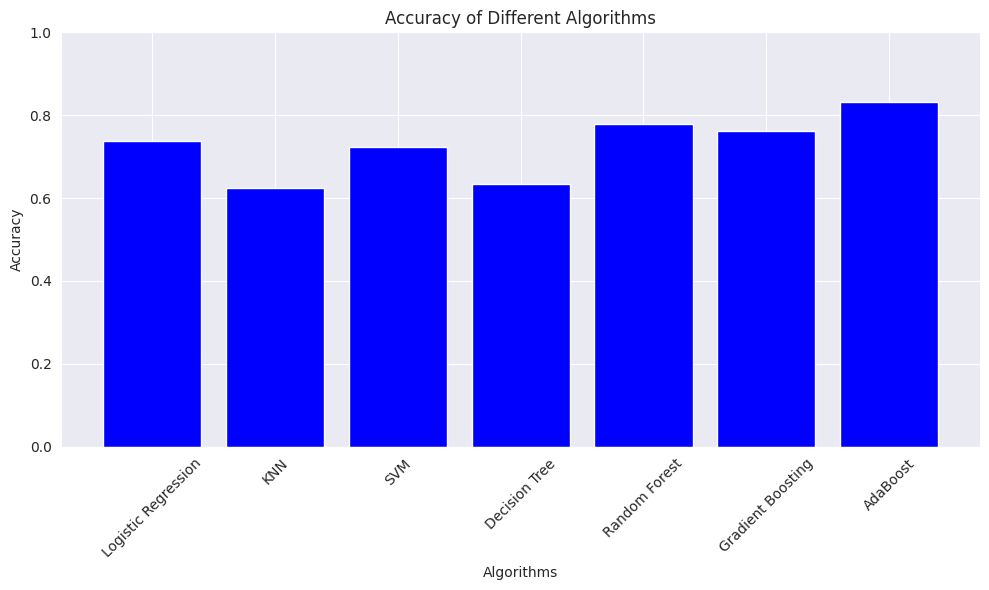

In [ ]:
import matplotlib.pyplot as plt

# List of algorithm names and their respective accuracy scores
algorithm_names = ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost"]
accuracy_scores = [0.7375, 0.625, 0.7225, 0.635, 0.78, 0.7625, 0.8325]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_scores, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


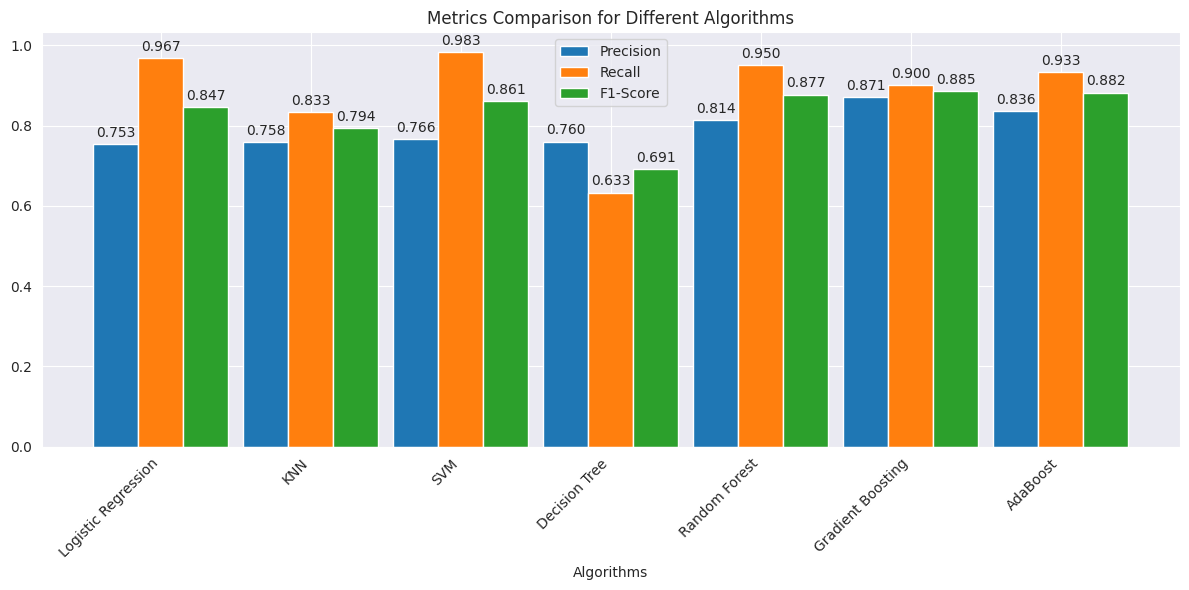

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of algorithm names
algorithm_names = ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost"]

# Precision, recall, and F1-score values for each algorithm
precision_scores = [0.753, 0.758, 0.766, 0.76, 0.814, 0.871, 0.836]
recall_scores = [0.967, 0.833, 0.983, 0.633, 0.95, 0.9, 0.933]
f1_scores = [0.847, 0.794, 0.861, 0.691, 0.877, 0.885, 0.882]

x = np.arange(len(algorithm_names))  # the label locations

width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_title('Metrics Comparison for Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithm_names, rotation=45, ha="right")
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()
